## Exploring the General Social Survey

Shuting Chen 

11/27/2017

### Lab Notebook 

In [177]:
# Import useful packages and load data 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline 
gss = pd.read_csv('gss2012.csv')

### Exploring the income distribution of the U.S. 

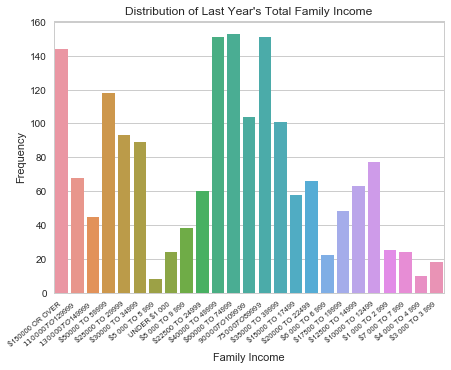

In [258]:
# Choosing "income06" as the variable: 
# "income06" - in which of these groups did your total family income fall last year before taxes
plt.figure(figsize=(7,5))
ax = sns.countplot(x="income06", data=gss)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.xlabel(r'Family Income')
plt.ylabel(r'Frequency')
plt.title("Distribution of Last Year's Total Family Income")
plt.show()

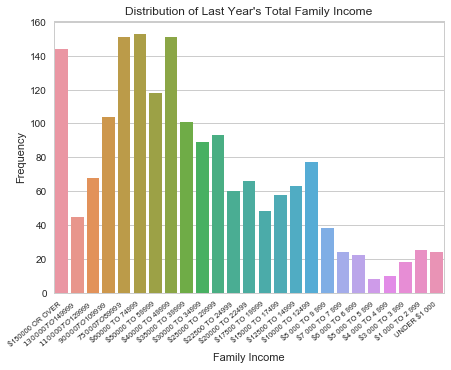

In [257]:
# The values in the x axis are not in order, thus revise the code with 'order' parameter
s = ['$150000 OR OVER', '$130000 TO $149999', '$110000 TO $129999', '$90000 TO $109999', '$75000 TO $89999', 
     '$60000 TO 74999', '$50000 TO 59999', '$40000 TO 49999', '$35000 TO 39999', '$30000 TO 34999', '$25000 TO 29999', 
     '$22500 TO 24999', '$20000 TO 22499', '$17500 TO 19999', '$15000 TO 17499', '$12500 TO 14999', '$10000 TO 12499', 
     '$8 000 TO 9 999', '$7 000 TO 7 999', '$6 000 TO 6 999', '$5 000 TO 5 999', '$4 000 TO 4 999', '$3 000 TO 3 999', 
     '$1 000 TO 2 999', 'UNDER $1 000']
plt.figure(figsize=(7,5))
ax = sns.countplot(x="income06", data=gss, order = s)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.xlabel(r'Family Income')
plt.ylabel(r'Frequency')
plt.title("Distribution of Last Year's Total Family Income")
plt.show()

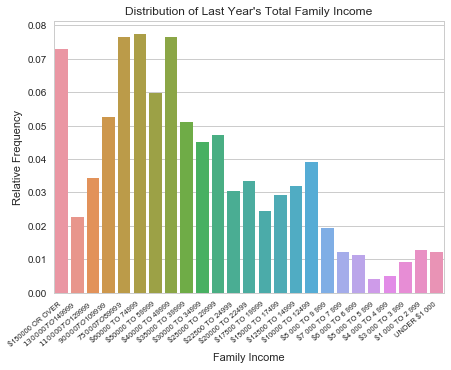

In [254]:
# Change the vertical axis into relative frequency 
plt.figure(figsize=(7,5))
ax = sns.barplot(x="income06", y="income06", data=gss, estimator=lambda x: len(x) / len(gss), orient="v", 
                 order = s) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.xlabel(r'Family Income')
plt.ylabel(r'Relative Frequency')
plt.title("Distribution of Last Year's Total Family Income")
plt.show()

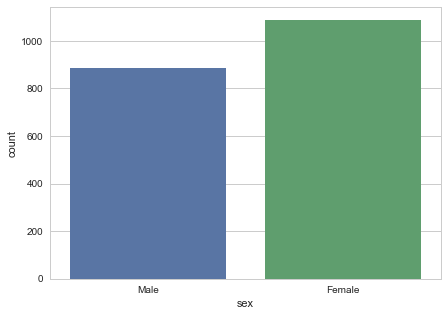

In [180]:
# Case 1: Gender
# General information about gender 
plt.figure(figsize=(7,5))
g = sns.countplot(x="sex", data=gss)
plt.show()

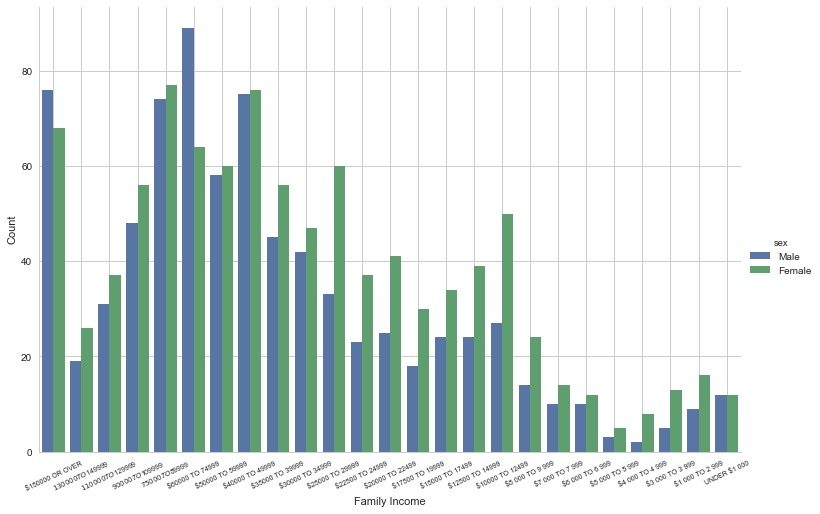

In [220]:
# Within each subgroup of income levels, specify the counts by gender
plt.figure(figsize=(7,5))
g1 = sns.factorplot('income06', kind='count', hue='sex', data=gss, size=7, aspect = 1.5, order = s)
g1.set_xticklabels(rotation=25, fontsize=7)
plt.grid(True)
plt.xlabel(r'Family Income')
plt.ylabel(r'Count')
plt.show()

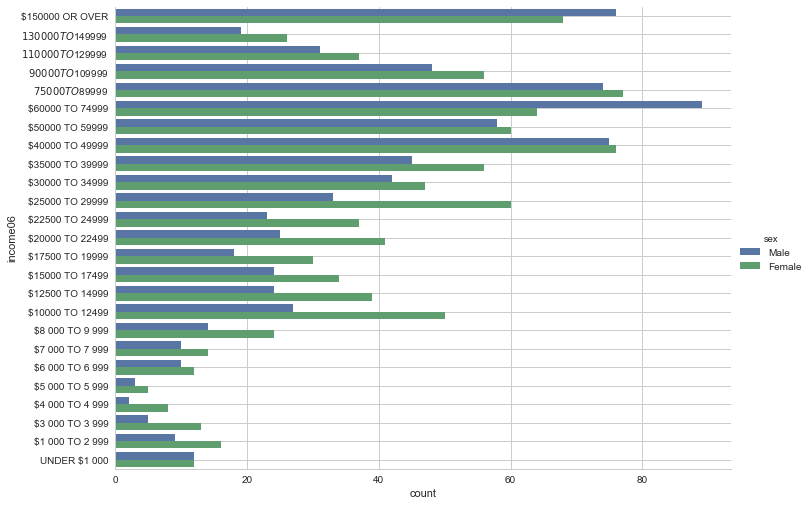

In [224]:
# Another way of visualizing the results
plt.figure(figsize=(7,5))
sns.factorplot(y='income06', kind='count', hue='sex', data=gss, size=7, aspect = 1.5, order = s)
plt.grid(True)
plt.show()

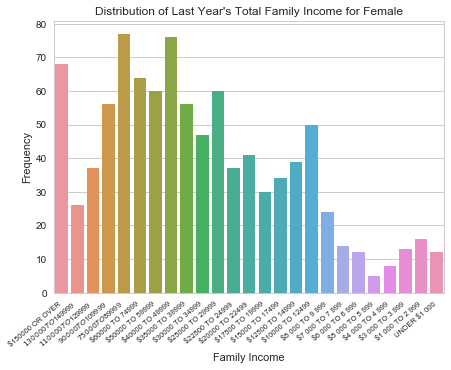

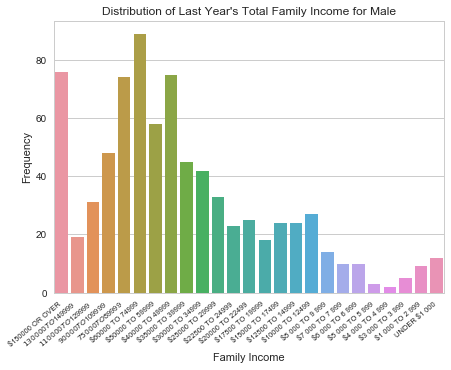

In [255]:
# Alternatively, we can create the income distribution for males and females respectively. 
# What is the difference of income distribution between males and females? 
for gender, gender_df in gss.groupby("sex"):
    plt.figure(figsize=(7,5))
    g2 = sns.countplot(x="income06", data=gender_df, order = s)
    g2.set_xticklabels(g2.get_xticklabels(), rotation=40, ha="right")
    g2.set_xticklabels(g2.get_xticklabels(), fontsize=7.5)
    plt.xlabel(r'Family Income')
    plt.ylabel(r'Frequency')
    plt.title("Distribution of Last Year's Total Family Income for {}".format(gender))
    plt.show()

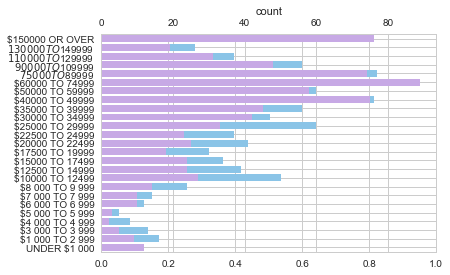

In [226]:
# Overlay the two bar charts 
fig, sex1 = plt.subplots()
sex2 = sex1.twiny()
sex1 = sns.countplot(y="income06", data=gss[gss.sex == 'Female'], color = "xkcd:lightblue", order = s)
sex2 = sns.countplot(y="income06", data=gss[gss.sex == 'Male'], color = "xkcd:lavender", order = s)

Text(0.5,1,'Boxplot of Age')

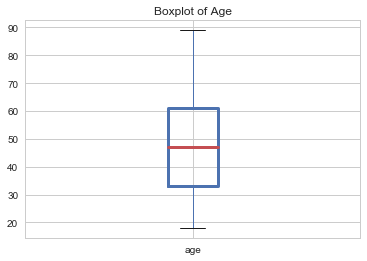

In [185]:
# Case 2: Age
# What is the income distribution within each age group and what are the differences across different age groups? 
# First, get basic information about age distribution in this sample - boxplot 
bp1 = gss.boxplot("age", boxprops = dict(linewidth=3), medianprops = dict(linewidth=3))
bp1.set_title("Boxplot of Age")

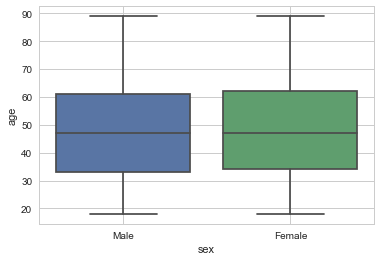

In [186]:
# Age by gender 
bp2 = sns.boxplot(x="sex", y="age", data=gss)
plt.grid(True)
plt.show()

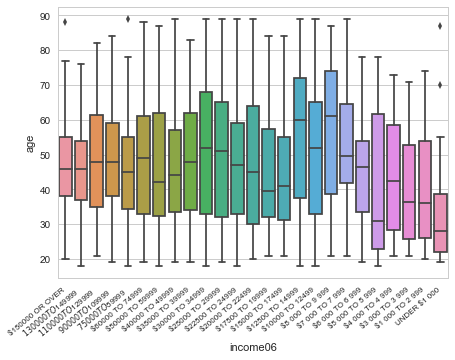

In [227]:
# Age distribution within each income range - boxplot 
plt.figure(figsize=(7,5))
bp3 = sns.boxplot(x="income06", y="age", data=gss, order = s)
bp3.set_xticklabels(bp3.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.show()

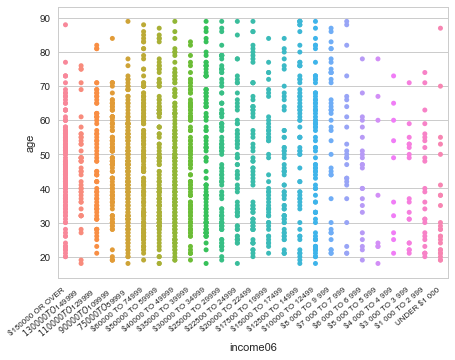

In [228]:
# Age distribution within each income range - strip plot
plt.figure(figsize=(7,5))
sc1 = sns.stripplot(x="income06", y="age", data=gss, order = s)
sc1.set_xticklabels(sc1.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.show()

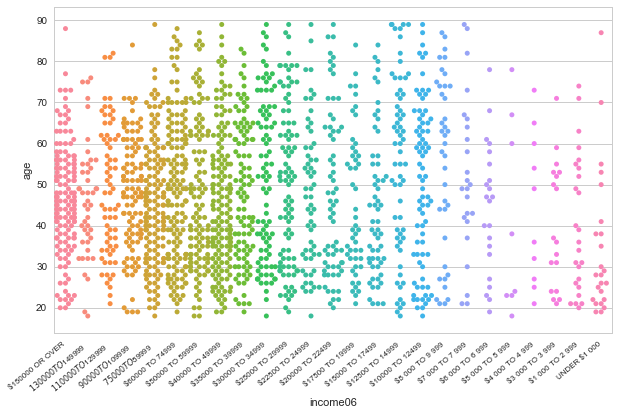

In [229]:
# Age distribution within each income range - a new strip plot adjusted for overlapping
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", color_codes=True)
sc2 = sns.swarmplot(x="income06", y="age", data=gss, order = s)
sc2.set_xticklabels(sc2.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.show()

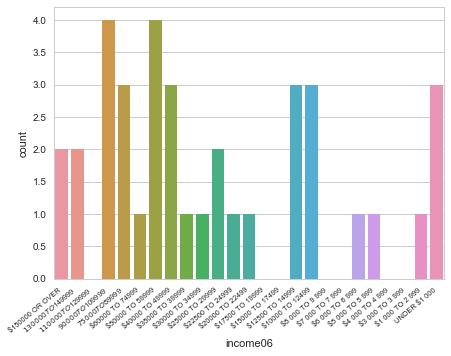

In [230]:
# Assign people into different age groups and generate income distribution within each group 
df_1 = gss[gss.age <= 20] # for people <= 20 years old 
plt.figure(figsize=(7,5))
age1 = sns.countplot(x="income06", data=df_1, order = s)
age1.set_xticklabels(age1.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.show()

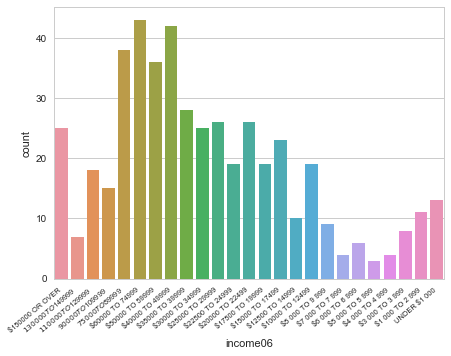

In [235]:
# Age group: 20 < age <= 35
df_2 = gss[(gss.age > 20) & (gss.age <= 35)] 
plt.figure(figsize=(7,5))
age2 = sns.countplot(x="income06", data=df_2, order = s)
age2.set_xticklabels(age2.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.show()

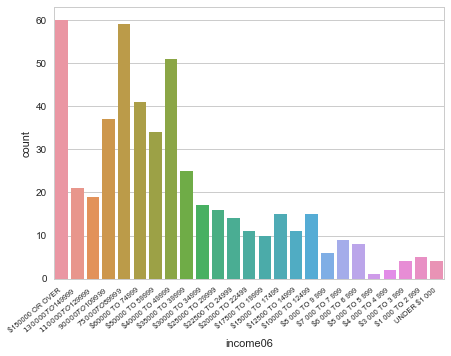

In [236]:
# Age group: 35 < age <= 50
df_3 = gss[(gss.age > 35) & (gss.age <= 50)] 
plt.figure(figsize=(7,5))
age3 = sns.countplot(x="income06", data=df_3, order = s)
age3.set_xticklabels(age3.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.show()

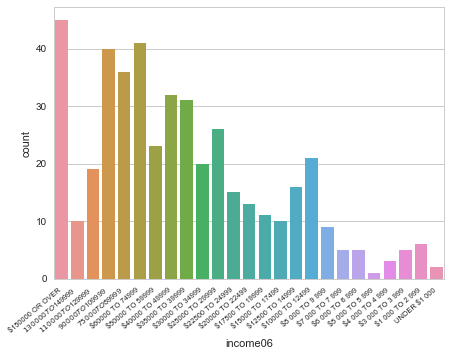

In [237]:
# Age group: 50 < age <= 65
df_4 = gss[(gss.age > 50) & (gss.age <= 65)] 
plt.figure(figsize=(7,5))
age4 = sns.countplot(x="income06", data=df_4, order = s)
age4.set_xticklabels(age4.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.show()

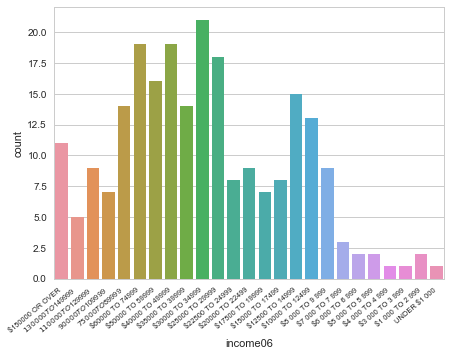

In [239]:
# Age group: 65 < age <= 80
df_5 = gss[(gss.age > 65) & (gss.age <= 80)] 
plt.figure(figsize=(7,5))
age5 = sns.countplot(x="income06", data=df_5, order = s)
age5.set_xticklabels(age5.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.show()

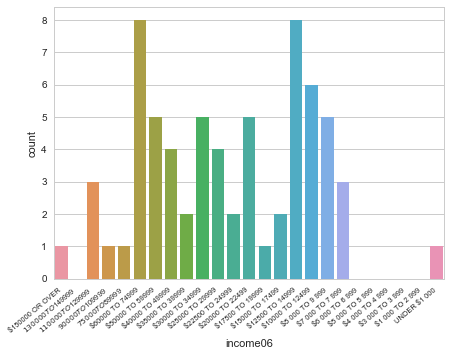

In [240]:
# Age group: 80 < age 
df_6 = gss[gss.age > 80] 
plt.figure(figsize=(7,5))
age6 = sns.countplot(x="income06", data=df_6, order = s)
age6.set_xticklabels(age6.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.show()

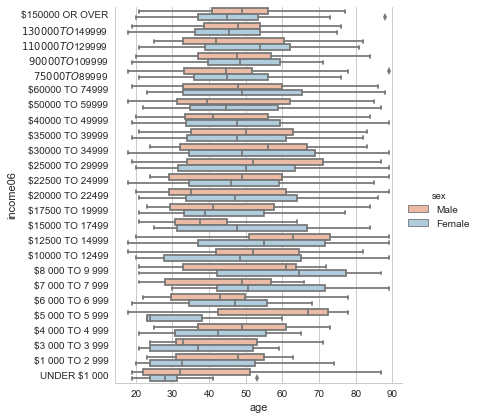

In [241]:
# Family income distribution across respondent's gender and age 
sns.factorplot(x="age", y="income06", hue="sex", data=gss, kind="box", palette="RdBu",size=6, aspect=1, order = s)

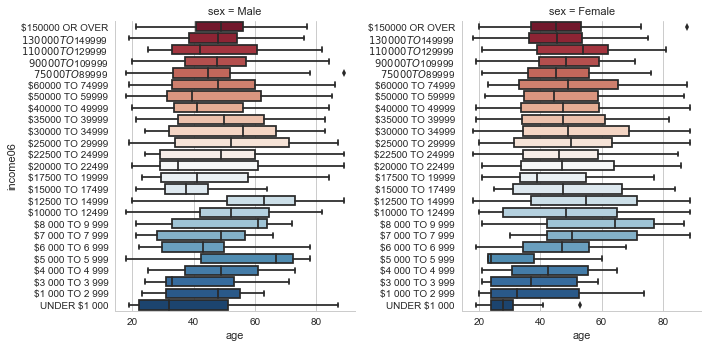

In [242]:
# Family income distribution across respondent's gender and age - another version 
sns.factorplot(x="age", y="income06", col="sex", data=gss, kind="box", palette="RdBu",size=5, aspect=1, order = s)

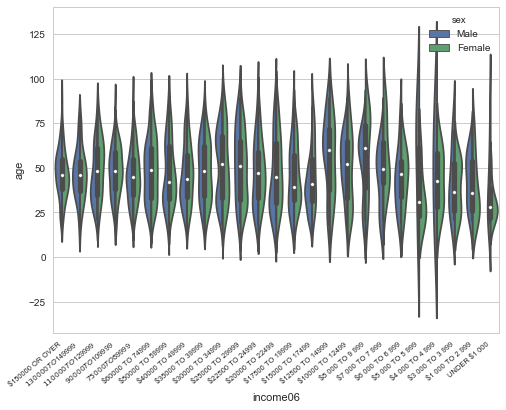

In [243]:
# Family income distribution across respondent's gender and age - violinplot
plt.figure(figsize=(8,6))
vl = sns.violinplot(y="age", x="income06", hue="sex", data=gss, split=True, order = s)
vl.set_xticklabels(vl.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.show()

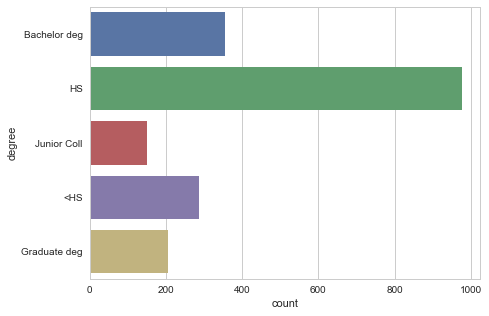

In [199]:
# Case 3: Degree
# Does respondent's eduation level affect his/her family income? If so, to what extent does it influence his/her 
# family income? 
# General information about 'degree'
plt.figure(figsize=(7,5))
d = sns.countplot(y="degree", data=gss)
plt.show()

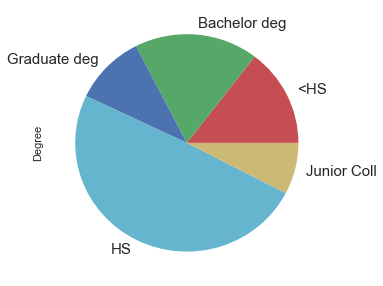

In [200]:
# Depict 'degree' by pie chart
counts = []
degrees = []
for de, de_df in gss.groupby("degree"):
    counts.append(len(de_df))
    degrees.append(de)
pc = pd.Series(counts, index=degrees, name="Degree")
pc.plot.pie(labels = degrees, colors=['r', 'g', 'b', 'c', 'y'], fontsize=15, figsize=(5, 5))

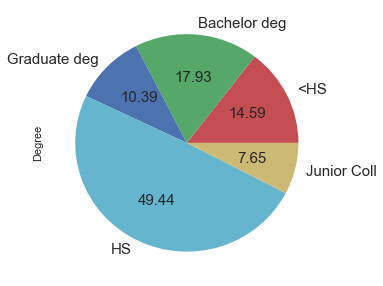

In [201]:
# Add proportions to pie chart
pc.plot.pie(labels = degrees, colors=['r', 'g', 'b', 'c', 'y'], autopct='%.2f', fontsize=15, figsize=(5, 5))

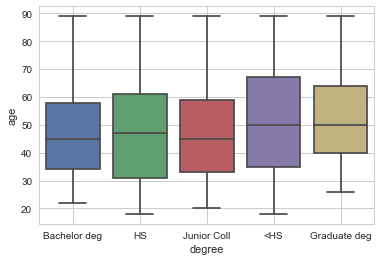

In [202]:
# Age distribution within each degree group 
bp4 = sns.boxplot(x="degree", y="age", data=gss)
plt.grid(True)
plt.show()

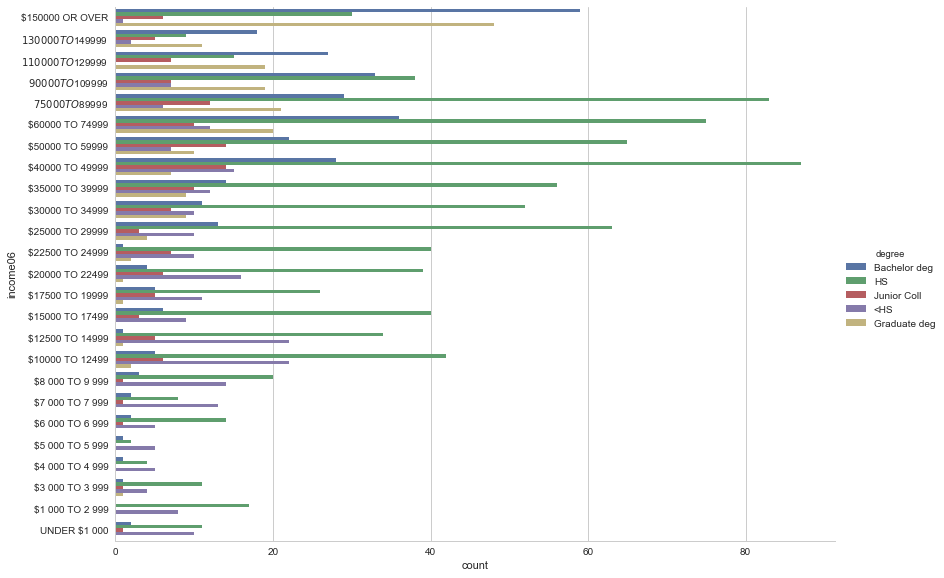

In [244]:
# Within each subgroup of income levels, specify the counts by education level
edu = sns.factorplot(y='income06', kind='count', hue='degree', data=gss, size=8, aspect = 1.5, order = s)
plt.show()

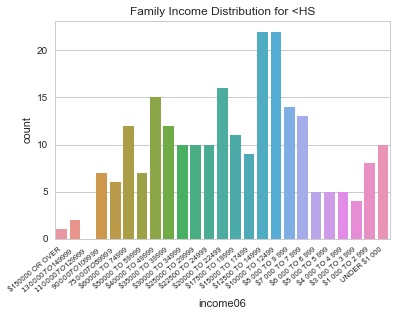

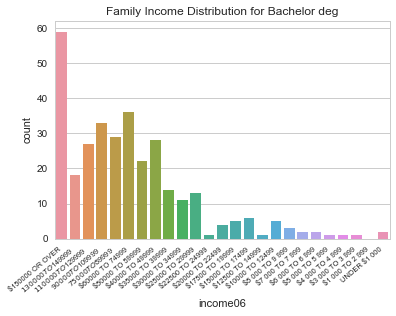

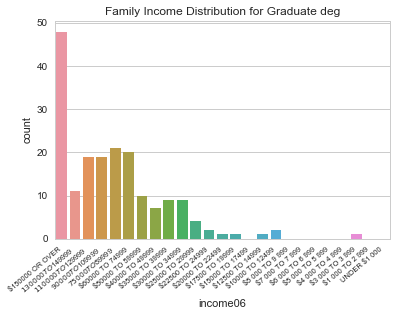

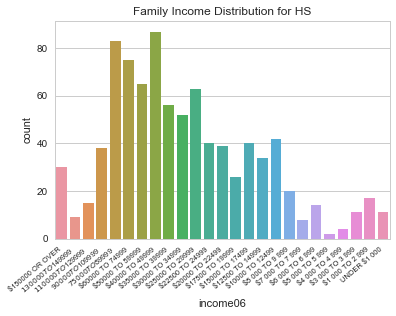

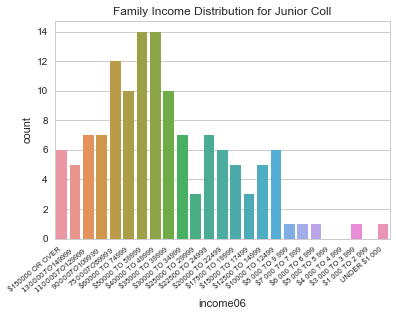

In [245]:
# Assign people into different degree groups and generate income distribution within each group 
for degree in degrees: 
    plt.figure(figsize=(6,4))
    new_df = gss[gss.degree == degree]
    deg = sns.countplot(x="income06", data=new_df, order = s)
    deg.set_xticklabels(deg.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
    plt.title("Family Income Distribution for {}".format(degree))

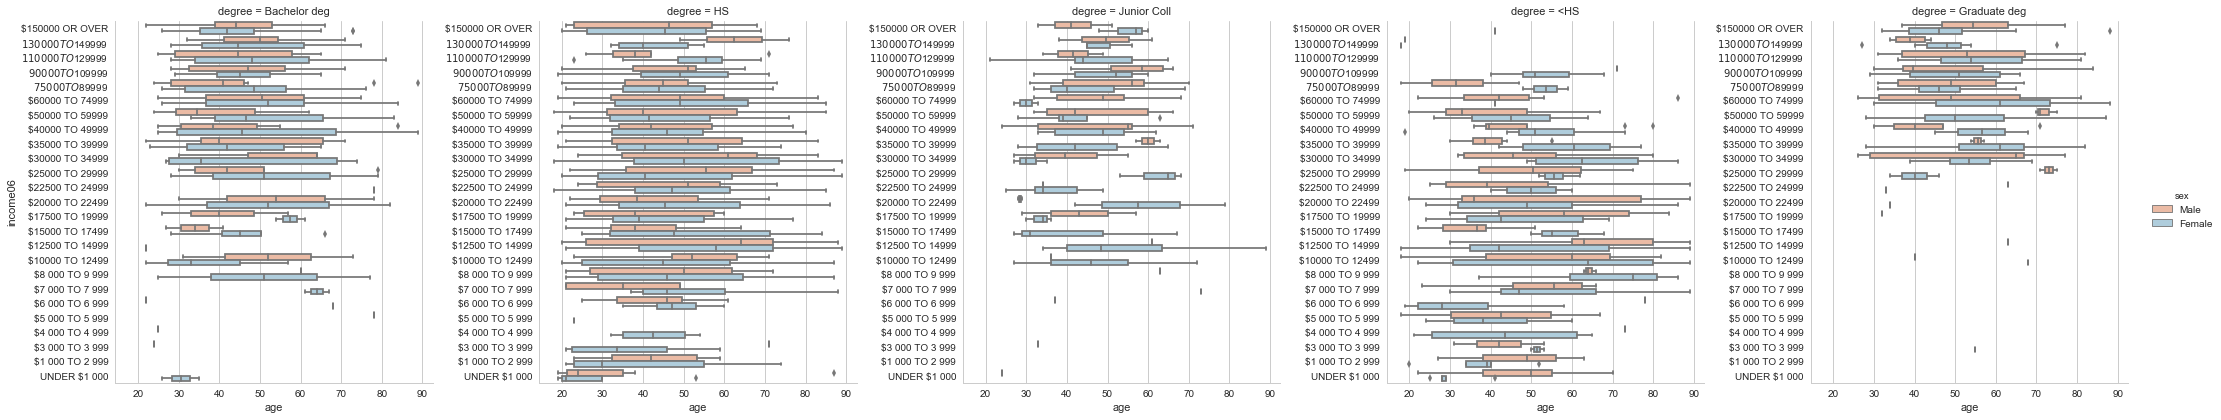

In [246]:
# Family income distribution across respondent's gender, age and degree 
sns.factorplot(x="age", y="income06", hue="sex", col="degree", data=gss, kind="box", palette="RdBu", 
               size=6, aspect=1, order = s)

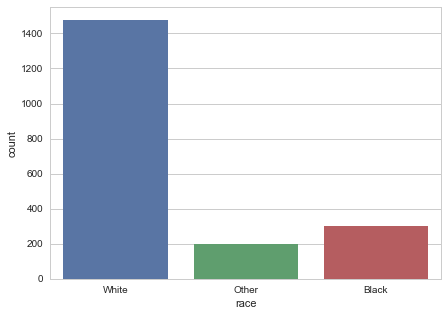

In [206]:
# Subcase 4: Race 
# Does race have impact on individual's family income? If so, to what extent does it affect? 
# General information about 'race'
plt.figure(figsize=(7,5))
ra = sns.countplot(x="race", data=gss)
plt.show()

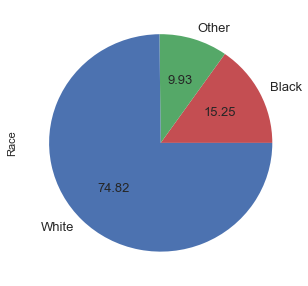

In [207]:
# Depict 'race' by pie chart
counts1 = []
race = []
for r, r_df in gss.groupby("race"):
    counts1.append(len(r_df))
    race.append(r)
pc1 = pd.Series(counts1, index=race, name="Race")
pc1.plot.pie(labels = race, colors=['r', 'g', 'b'], autopct='%.2f', fontsize=13, figsize=(5, 5))

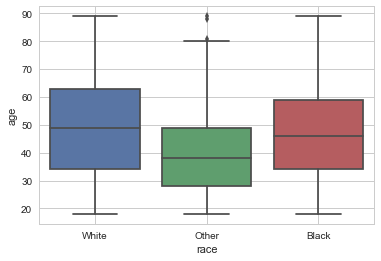

In [208]:
# Age distribution within each race group 
bp5 = sns.boxplot(x="race", y="age", data=gss)
plt.grid(True)
plt.show()

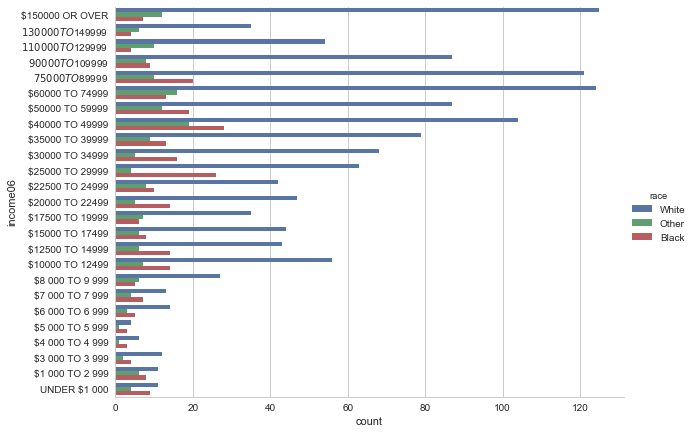

In [247]:
# Within each subgroup of income levels, specify the counts by race
rac = sns.factorplot(y='income06', kind='count', hue='race', data=gss, size=6, aspect = 1.5, order = s)
plt.show()

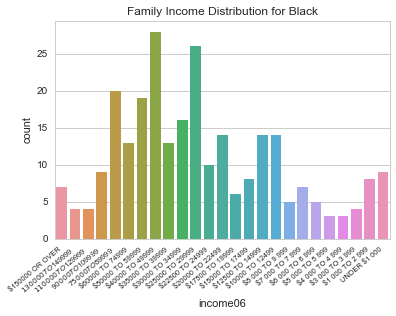

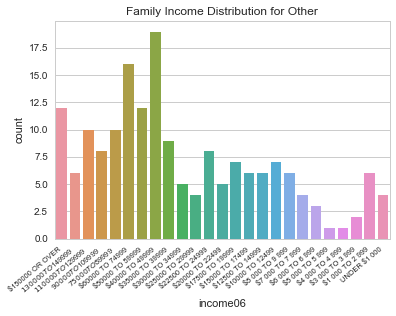

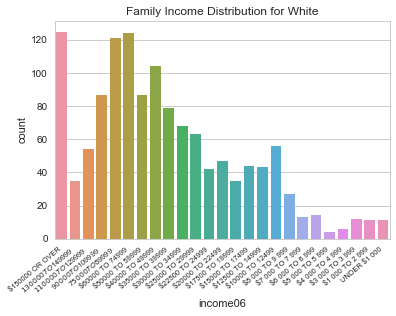

In [248]:
# Assign people into different race groups and generate income distribution within each group 
for r in race: 
    plt.figure(figsize=(6,4))
    new_df = gss[gss.race == r]
    deg = sns.countplot(x="income06", data=new_df, order = s)
    deg.set_xticklabels(deg.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
    plt.title("Family Income Distribution for {}".format(r))

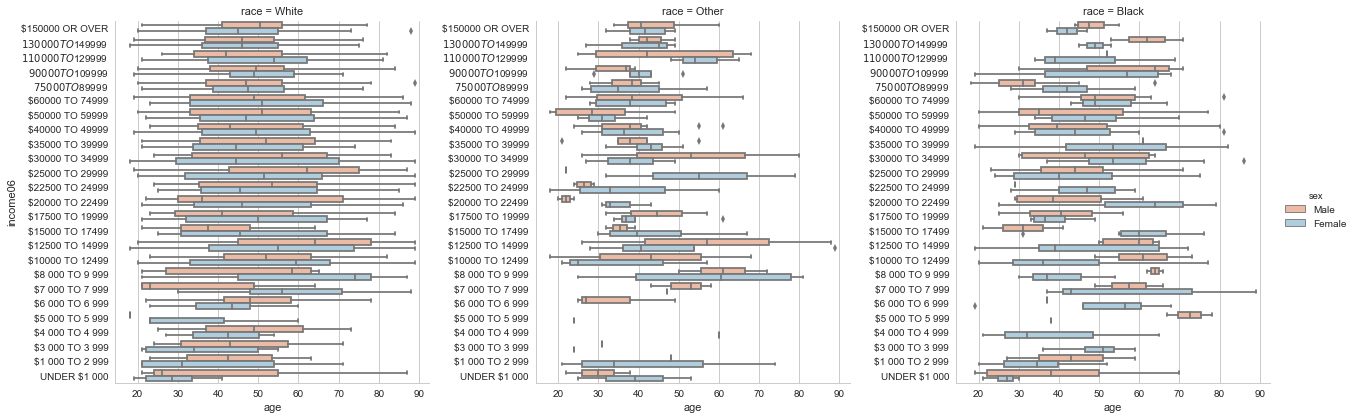

In [249]:
# Family income distribution across respondent's gender, age and race 
sns.factorplot(x="age", y="income06", hue="sex", col="race", data=gss, kind="box", palette="RdBu", 
               size=6, aspect=1, order = s)

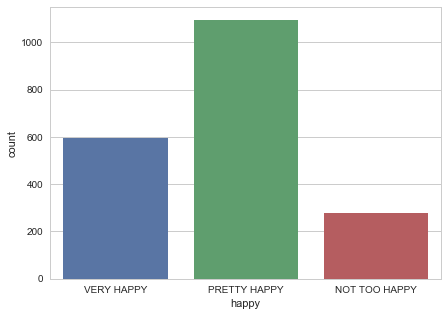

In [212]:
# Case 5: Happiness
# Does happiness have impact on individual's family income? If so, to what extent does it affect? 
# General information about 'happy'
plt.figure(figsize=(7,5))
h = sns.countplot(x="happy", data=gss)
plt.show()

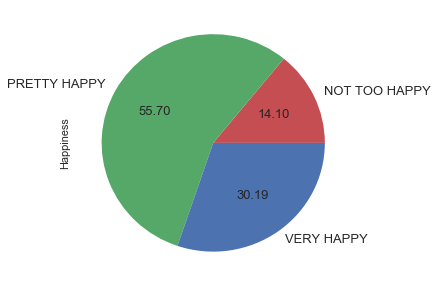

In [213]:
# Depict 'happy' by pie chart
counts2 = []
hy = []
for h, h_df in gss.groupby("happy"):
    counts2.append(len(h_df))
    hy.append(h)
pc2 = pd.Series(counts2, index=hy, name="Happiness")
pc2.plot.pie(labels = hy, colors=['r', 'g', 'b'], autopct='%.2f', fontsize=13, figsize=(5, 5))

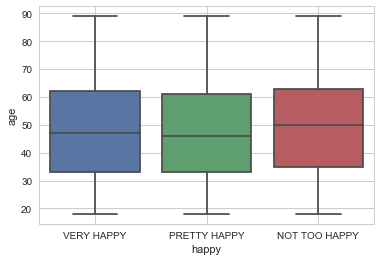

In [214]:
# Age distribution within each happiness group 
bp6 = sns.boxplot(x="happy", y="age", data=gss)
plt.grid(True)
plt.show()

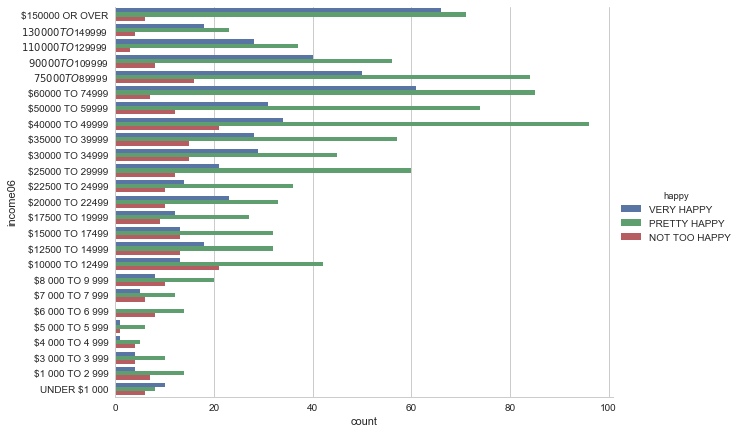

In [250]:
# Within each subgroup of income levels, specify the counts by happiness
hap = sns.factorplot(y='income06', kind='count', hue='happy', data=gss, size=6, aspect = 1.5, order = s)
plt.show()

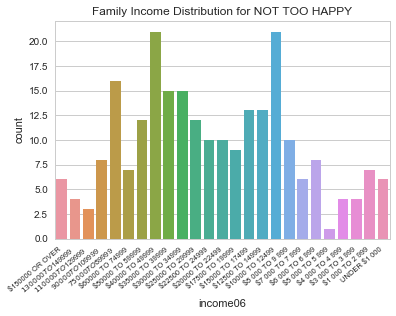

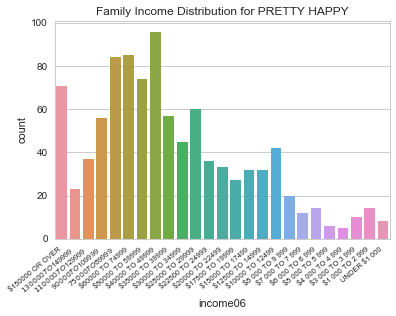

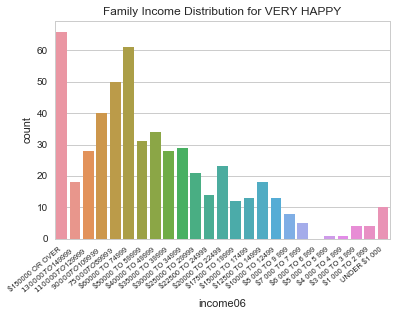

In [252]:
# Assign people into different happiness groups and generate income distribution within each group 
for h in hy: 
    plt.figure(figsize=(6,4))
    new_df = gss[gss.happy == h]
    deg = sns.countplot(x="income06", data=new_df, order = s)
    deg.set_xticklabels(deg.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
    plt.title("Family Income Distribution for {}".format(h))

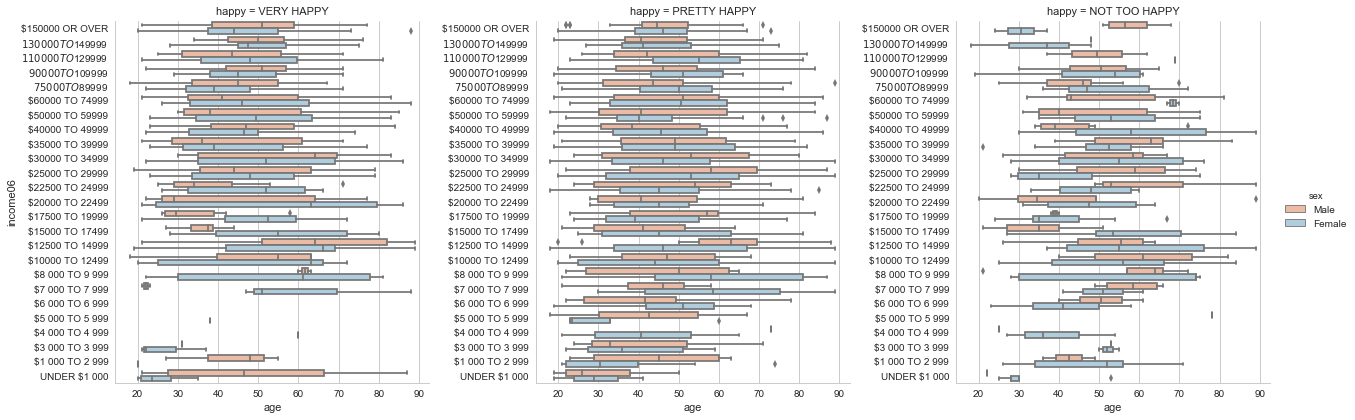

In [253]:
# Family income distribution across respondent's gender, age and hapiness 
sns.factorplot(x="age", y="income06", hue="sex", col="happy", data=gss, kind="box", palette="RdBu", 
               size=6, aspect=1, order = s)